In [1]:
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

In [4]:
train_tweets = pd.read_csv(r"C:\Users\Dell\Desktop\DBT\train_tweets.csv")
test_tweets = pd.read_csv(r"C:\Users\Dell\Desktop\DBT\test_tweets.csv")

In [6]:
train_tweets = train_tweets[['label','tweet']]
test=test_tweets['tweet']

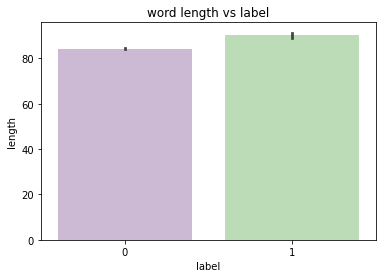

In [7]:
train_tweets['length'] = train_tweets['tweet'].apply(len)
fig = sns.barplot('label','length',data=train_tweets,palette='PRGn')
plt.title('word length vs label')
plt.show()

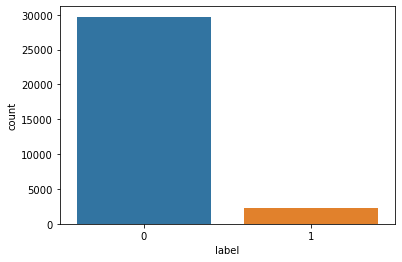

In [8]:
sns.countplot(x='label',data=train_tweets)

In [15]:
def text_processing(tweet):
    #generating list of words(punctuation removed)
    def form_sentence(tweet):
        tweet_blob=TextBlob(tweet)
        return ' '.join(tweet_blob.words)
    new_tweet = form_sentence(tweet)
    
    #removing stopwords
    def no_user(tweet):
        tweet_list = [ele for ele in tweet.split() if ele!='user']
        clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
        clean_s = ' '.join(clean_tokens)
        clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
        return clean_mess
    no_punc_tweet = no_user(new_tweet)
    
    #normalizing the words in tweet
    def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    return normalization(no_punc_tweet)        

In [12]:
import nltk

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
train_tweets['tweet_list'] = train_tweets['tweet'].apply(text_processing) 
test_tweets['tweet_list'] = test_tweets['tweet'].apply(text_processing)

In [17]:
train_tweets[train_tweets['label']==1].drop('tweet',axis=1).head()

,label,length,tweet_list
13,1,74,"[cnn, call, michigan, middle, school, wall, ch..."
14,1,101,"[comment, australia, opkillingbay, seashepherd..."
17,1,22,"[retweet, agree]"
23,1,47,"[lumpy, say, prove, lumpy]"
34,1,104,"[unbelievable, century, need, something, like,..."
